In [1]:
# import tensorflow.keras as keras
# import tensorflow as tf
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense
# from RNN.preproseccing import get_confirmed_ru


# import tensorflow as tf
import keras as keras
# import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot as plt

Using TensorFlow backend.
/Users/chernovandrey/anaconda3/envs/tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chernovandrey/anaconda3/envs/tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chernovandrey/anaconda3/envs/tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
# tf.__version__

In [3]:
keras.__version__

'2.2.5'

In [4]:
n_output = 1
data_scale = False

In [5]:
TDA = pd.read_csv('TDA_confirmed_anomalies.csv')
TDA['TDA_final_short'].value_counts()
TDA = TDA.replace('United States', 'US')

In [6]:
TDA['TDA_final_short'].value_counts()

Medium infection                       46
Rare infected, slow speed              37
Rare infected, high speed              31
Never Infected                         25
Outliers                               18
Small infection in the end of March    17
The most infected                      11
Quasi countries                         3
Name: TDA_final_short, dtype: int64

In [7]:
TDA['Country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [8]:
# include_country = ['Germany']
# include_country = list(TDA.loc[TDA['TDA_final_short'] == 'Medium infection', 'Country'].values)

In [9]:
from keras import backend as K

In [10]:
from preproseccing import get_data, create_ts_train_test_data, get_data_diff, get_data_division
from calculate_metrics import get_metrics, construct_ts, get_metrics_from_df
from models import get_model_fc

In [11]:
log_scale = False
n_steps=5

In [12]:
only_labels =False

In [13]:
drop_country =  ['Afghanistan', 'Luxembourg', 'Liechtenstein', 'Iceland',
       'Trinidad and Tobago', 'Peru', 'Guatemala', 'Qatar',
       'Saint Kitts and Nevis', 'Chile', 'Costa Rica', 'San Marino',
       'Barbados', 'Australia', 'Argentina', 'Andorra', 'Saint Lucia',
       'Mauritius','MS Zaandam', 'Diamond Princess', 'Holy See']

In [14]:
target = ['Confirmed', 'Deaths', 'Recovered']
# target  = ['Confirmed']
md_features = ['Country', 'Date']
# X_features= ['Population', 'GrowthRate', 'Area', 'Density', 'Airports', 'GDP']
X_features= ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', #'C7_Restrictions on internal movement',
        'C8_International travel controls', 'E1_Income support',
        'E2_Debt/contract relief', #'E3_Fiscal measures',
#        'E4_International support', 'H1_Public information campaigns',
#        'H2_Testing policy', 'H3_Contact tracing',
#        'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',#, 'Population']
#           'GrowthRate', 'Area', 'Density', 'Airports', 'GDP', 
#              'embeddingval1', 'embeddingval2', 'embeddingval3',
#        'embeddingval4', 'embeddingval5', 'embeddingval6', 'embeddingval7',
#        'embeddingval8', 'embeddingval9', 'embeddingval10', 'embeddingval11',
#        'embeddingval12', 'embeddingval13', 'embeddingval14', 'embeddingval15',
#        'embeddingval16', 'embeddingval17', 'embeddingval18', 'embeddingval19',
#        'embeddingval20',
           'Population' ] 
# X_features = ['C2_Workplace closing', 'Population']
# embed_features = [ 'embeddingval1', 'embeddingval2', 'embeddingval3',
#        'embeddingval4', 'embeddingval5', 'embeddingval6', 'embeddingval7',
#        'embeddingval8', 'embeddingval9', 'embeddingval10', 'embeddingval11',
#        'embeddingval12', 'embeddingval13', 'embeddingval14', 'embeddingval15',
#        'embeddingval16', 'embeddingval17', 'embeddingval18', 'embeddingval19',
#        'embeddingval20']

In [15]:
data = get_data(return_only_labels=only_labels)

/Users/chernovandrey/anaconda3/envs/tf_keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [16]:
data

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,RegionName,RegionCode,C1_School closing,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Population,GrowthRate,Area,Density,Airports,GDP
0,Afghanistan,33.939110,67.709953,03/22/2020,40,1,1,NaN,NaN,3.0,...,NaN,37.746,0.5,64.83,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
1,Afghanistan,33.939110,67.709953,03/23/2020,40,1,1,NaN,NaN,3.0,...,NaN,37.746,0.5,64.83,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
2,Afghanistan,33.939110,67.709953,03/24/2020,74,1,1,NaN,NaN,3.0,...,NaN,37.746,0.5,64.83,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
3,Afghanistan,33.939110,67.709953,03/25/2020,84,2,2,NaN,NaN,3.0,...,NaN,37.746,0.5,64.83,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
4,Afghanistan,33.939110,67.709953,03/26/2020,94,4,2,NaN,NaN,3.0,...,NaN,37.746,0.5,64.83,38041.754,1.0233,652230.0,58.3257,22.0,74792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,Zimbabwe,-19.015438,29.154857,08/28/2020,6388,195,5043,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,14645.468,1.0148,390757.0,37.4797,16.0,37039.0
38789,Zimbabwe,-19.015438,29.154857,08/29/2020,6406,196,5056,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,14645.468,1.0148,390757.0,37.4797,16.0,37039.0
38790,Zimbabwe,-19.015438,29.154857,08/30/2020,6412,196,5061,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,14645.468,1.0148,390757.0,37.4797,16.0,37039.0
38791,Zimbabwe,-19.015438,29.154857,08/31/2020,6497,202,5221,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,14645.468,1.0148,390757.0,37.4797,16.0,37039.0


In [17]:
for f in X_features[:-1]:
    data.loc[data[f] > 0.0, f] = 1.0

In [18]:
data[X_features]

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C8_International travel controls,E1_Income support,E2_Debt/contract relief,Population
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38041.754
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38041.754
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38041.754
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,38041.754
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,38041.754
...,...,...,...,...,...,...,...,...,...,...
38788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14645.468
38789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14645.468
38790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14645.468
38791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14645.468


In [19]:
data[X_features].corr(method= 'kendall')

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C8_International travel controls,E1_Income support,E2_Debt/contract relief,Population
C1_School closing,1.000000,0.525865,0.553130,0.371548,0.269252,0.440196,0.166072,0.204548,0.232091,0.081776
C2_Workplace closing,0.525865,1.000000,0.560344,0.418070,0.329397,0.486790,0.112502,0.288204,0.253025,0.136624
C3_Cancel public events,0.553130,0.560344,1.000000,0.493787,0.286814,0.485556,0.094418,0.213007,0.210945,0.075992
C4_Restrictions on gatherings,0.371548,0.418070,0.493787,1.000000,0.286059,0.337285,0.124156,0.206652,0.209872,-0.057939
C5_Close public transport,0.269252,0.329397,0.286814,0.286059,1.000000,0.427767,0.030489,0.119208,0.140850,0.007046
C6_Stay at home requirements,0.440196,0.486790,0.485556,0.337285,0.427767,1.000000,0.079893,0.246101,0.255510,0.163051
C8_International travel controls,0.166072,0.112502,0.094418,0.124156,0.030489,0.079893,1.000000,0.028909,0.056511,0.016364
E1_Income support,0.204548,0.288204,0.213007,0.206652,0.119208,0.246101,0.028909,1.000000,0.496641,0.078227
E2_Debt/contract relief,0.232091,0.253025,0.210945,0.209872,0.140850,0.255510,0.056511,0.496641,1.000000,0.073568
Population,0.081776,0.136624,0.075992,-0.057939,0.007046,0.163051,0.016364,0.078227,0.073568,1.000000


In [20]:
data.shape

(38793, 68)

In [21]:
include_country = ['Brazil']
data = data.loc[~data['Country'].isin(drop_country)]

In [22]:
data.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'RegionName', 'RegionCode', 'C1_School closing', 'C2_Workplace closing',
       'C3_Cancel public events', 'C4_Restrictions on gatherings',
       'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'StringencyIndex', 'StringencyLegacyIndex',
       'GovernmentResponseIndex', 'ContainmentHealthIndex',
       'EconomicSupportIndex', 'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
 

In [23]:
data = data[md_features + target + X_features]
data = data.loc[data['Country'].isin(include_country)]

In [24]:
data[data.columns[5:]].corr(method= 'kendall')

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C8_International travel controls,E1_Income support,E2_Debt/contract relief,Population
C1_School closing,1.000000,0.863397,1.000000,0.769888,0.535978,0.863397,0.863397,0.330289,0.603023,NaN
C2_Workplace closing,0.863397,1.000000,0.863397,0.891696,0.620778,1.000000,1.000000,0.382546,0.698430,NaN
C3_Cancel public events,1.000000,0.863397,1.000000,0.769888,0.535978,0.863397,0.863397,0.330289,0.603023,NaN
C4_Restrictions on gatherings,0.769888,0.891696,0.769888,1.000000,0.696177,0.891696,0.891696,0.429009,0.783260,NaN
C5_Close public transport,0.535978,0.620778,0.535978,0.696177,1.000000,0.620778,0.620778,0.616236,0.888819,NaN
C6_Stay at home requirements,0.863397,1.000000,0.863397,0.891696,0.620778,1.000000,1.000000,0.382546,0.698430,NaN
C8_International travel controls,0.863397,1.000000,0.863397,0.891696,0.620778,1.000000,1.000000,0.382546,0.698430,NaN
E1_Income support,0.330289,0.382546,0.330289,0.429009,0.616236,0.382546,0.382546,1.000000,0.547723,NaN
E2_Debt/contract relief,0.603023,0.698430,0.603023,0.783260,0.888819,0.698430,0.698430,0.547723,1.000000,NaN
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
for features in X_features[:-1]:
    
    print(data[features].value_counts())
    if (data[features].value_counts().values < 10).any():
        X_features.remove(features)
        data = data.drop(features, axis=1)

1.0    165
0.0      3
Name: C1_School closing, dtype: int64
1.0    164
0.0      4
Name: C2_Workplace closing, dtype: int64
1.0    165
0.0      3
Name: C3_Cancel public events, dtype: int64
1.0    163
0.0      5
Name: C4_Restrictions on gatherings, dtype: int64
1.0    158
0.0     10
Name: C5_Close public transport, dtype: int64
1.0    164
0.0      4
Name: C6_Stay at home requirements, dtype: int64
1.0    164
0.0      4
Name: C8_International travel controls, dtype: int64
1.0    144
0.0     24
Name: E1_Income support, dtype: int64
1.0    160
0.0      8
Name: E2_Debt/contract relief, dtype: int64


In [26]:
X_features

['C5_Close public transport', 'E1_Income support', 'Population']

In [27]:
X_features

['C5_Close public transport', 'E1_Income support', 'Population']

In [28]:
data.isnull().sum(axis = 0) 
# data = data.fillna(method='ffill')

Country                      0
Date                         0
Confirmed                    0
Deaths                       0
Recovered                    0
C5_Close public transport    9
E1_Income support            9
Population                   0
dtype: int64

In [29]:
# data.loc['Date' == '07/18/2020', 'C2_Workplace closing']

In [30]:
data = data.dropna()
data.isnull().sum(axis = 0) 

Country                      0
Date                         0
Confirmed                    0
Deaths                       0
Recovered                    0
C5_Close public transport    0
E1_Income support            0
Population                   0
dtype: int64

In [31]:
data = data.dropna()

In [32]:
data.shape

(168, 8)

In [33]:
# data['C2_Workplace closing']

In [34]:
# data = data.loc[data['C2_Workplace closing'].isin([2.0,3.0])]
# data['C2_Workplace closing']  = data['C2_Workplace closing'] - 2.0

In [35]:
# data['C2_Workplace closing'].value_counts()

In [36]:
for i in target:
#     data[i] = data[i]/population
    data[i] = data[i]/data['Population']

In [37]:
data.head()

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
3525,Brazil,03/09/2020,0.000118,0.0,0.0,0.0,0.0,211049.527
3526,Brazil,03/10/2020,0.000147,0.0,0.0,0.0,0.0,211049.527
3527,Brazil,03/11/2020,0.000180,0.0,0.0,0.0,0.0,211049.527
3528,Brazil,03/12/2020,0.000246,0.0,0.0,0.0,0.0,211049.527
3529,Brazil,03/13/2020,0.000715,0.0,0.0,0.0,0.0,211049.527


In [38]:
data = data[md_features + target + X_features ]

In [39]:
data.isnull().sum(axis = 0) 

Country                      0
Date                         0
Confirmed                    0
Deaths                       0
Recovered                    0
C5_Close public transport    0
E1_Income support            0
Population                   0
dtype: int64

In [40]:
data.mean()

Confirmed                         4.866379
Deaths                            0.188843
Recovered                         3.371906
C5_Close public transport         0.940476
E1_Income support                 0.857143
Population                   211049.527000
dtype: float64

In [41]:
data['Country'].value_counts()

Brazil    168
Name: Country, dtype: int64

In [42]:
def get_data_diff(data, features=None, flag_percent=False):
    if features is None:
        features = ['Confirmed', 'Deaths', 'Recovered']
    countries = np.unique(data['Country'])
    data_diff = []
    for c in countries:
        data_c = data.loc[data['Country'] == c].sort_values(['Date'])
        data_d = data_c.copy()
        data_d[features] = data_c[features].diff()
        data_d = data_d.iloc[1:]
        if flag_percent:
            data_d[features] = data_d[features] / data_c[features].iloc[:-1].values
#         print(data_d)
        data_diff.append(data_d)
#         print(data_diff)
    return pd.concat(data_diff, axis=0, ignore_index=True)  # .drop(['index', 'level_0'], axis=1)


In [43]:
data_diff = get_data_diff(data, features = ['Confirmed'])

In [44]:
data_diff

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
0,Brazil,03/10/2020,0.000028,0.000000,0.000000,0.0,0.0,211049.527
1,Brazil,03/11/2020,0.000033,0.000000,0.000000,0.0,0.0,211049.527
2,Brazil,03/12/2020,0.000066,0.000000,0.000000,0.0,0.0,211049.527
3,Brazil,03/13/2020,0.000469,0.000000,0.000000,0.0,0.0,211049.527
4,Brazil,03/14/2020,0.000000,0.000000,0.000000,0.0,0.0,211049.527
...,...,...,...,...,...,...,...,...
162,Brazil,08/19/2020,0.233585,0.526417,13.276178,1.0,1.0,211049.527
163,Brazil,08/20/2020,0.214751,0.532122,13.477017,1.0,1.0,211049.527
164,Brazil,08/21/2020,0.143829,0.537116,13.530274,1.0,1.0,211049.527
165,Brazil,08/22/2020,0.237063,0.541342,13.807025,1.0,1.0,211049.527


In [45]:
data_diff = data_diff.dropna(axis='columns')

In [46]:
data_diff.columns

Index(['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'C5_Close public transport', 'E1_Income support', 'Population'],
      dtype='object')

In [47]:
data_diff.mean()

Confirmed                         0.102305
Deaths                            0.189974
Recovered                         3.392097
C5_Close public transport         0.946108
E1_Income support                 0.862275
Population                   211049.527000
dtype: float64

In [48]:
X_features = list(data_diff.columns[5:])

In [49]:
data_diff

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
0,Brazil,03/10/2020,0.000028,0.000000,0.000000,0.0,0.0,211049.527
1,Brazil,03/11/2020,0.000033,0.000000,0.000000,0.0,0.0,211049.527
2,Brazil,03/12/2020,0.000066,0.000000,0.000000,0.0,0.0,211049.527
3,Brazil,03/13/2020,0.000469,0.000000,0.000000,0.0,0.0,211049.527
4,Brazil,03/14/2020,0.000000,0.000000,0.000000,0.0,0.0,211049.527
...,...,...,...,...,...,...,...,...
162,Brazil,08/19/2020,0.233585,0.526417,13.276178,1.0,1.0,211049.527
163,Brazil,08/20/2020,0.214751,0.532122,13.477017,1.0,1.0,211049.527
164,Brazil,08/21/2020,0.143829,0.537116,13.530274,1.0,1.0,211049.527
165,Brazil,08/22/2020,0.237063,0.541342,13.807025,1.0,1.0,211049.527


In [50]:
only_labels = True
embed = False
if only_labels:
    if embed == True:
        data_mean = data_diff[target+ embed_features].mean()
    else:
        data_mean = data_diff[target].mean()
else:
    data_mean = data_diff[target + X_features].mean()

In [51]:
if only_labels:
    if embed == True:
        data_std = data_diff[target+ embed_features].std()
    else:
        data_std = data_diff[target].std()
else:
    data_std = data_diff[target + X_features].std()

In [52]:
# data_mean = pd.Series(0.0, index= [target[:n_output] + X_features])
# data_std = pd.Series(1.0, index= [target[:n_output] + X_features])

In [53]:
# if data_scale:
#     if only_labels:
#         if embed == True:
#             data_diff[target[:n_output]+embed_features] = (data_diff[target[:n_output]+embed_features] -
#                                                 data_mean[target[:n_output]+embed_features])\
#                 /data_std[target[:n_output]+embed_features] 
#         else:
#             data_diff[target[:n_output] = (data_diff[target[:n_output]] - data_mean[target[:n_output]])\
#                 /data_std[target[:n_output]
#     else:
#         data_diff[target[:n_output + X_features] = (data_diff[target[:n_output] + X_features] - 
#                                           data_mean[target[:n_output] + X_features].values)\
#                                     /data_std[target[:n_output] + X_features].values

In [54]:
only_labels = False

In [55]:
data_diff.head()

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
0,Brazil,03/10/2020,0.000028,0.0,0.0,0.0,0.0,211049.527
1,Brazil,03/11/2020,0.000033,0.0,0.0,0.0,0.0,211049.527
2,Brazil,03/12/2020,0.000066,0.0,0.0,0.0,0.0,211049.527
3,Brazil,03/13/2020,0.000469,0.0,0.0,0.0,0.0,211049.527
4,Brazil,03/14/2020,0.000000,0.0,0.0,0.0,0.0,211049.527


In [56]:
data_diff.shape

(167, 8)

In [57]:
data.shape

(168, 8)

In [58]:
data_diff.mean()

Confirmed                         0.102305
Deaths                            0.189974
Recovered                         3.392097
C5_Close public transport         0.946108
E1_Income support                 0.862275
Population                   211049.527000
dtype: float64

In [59]:
# plt.plot(data.loc[data['Country'] == 'US', 'C1_School closing'])

In [60]:
X_train, X_test, y_train, y_test, md_train, md_test = create_ts_train_test_data(data_diff, n_steps=n_steps)

In [61]:
X_train.shape

(131, 5, 6)

In [62]:
np.min(np.abs(X_train))

0.0

In [63]:
np.mean(X_test)

35177.1040624214

In [64]:
# X_train

In [65]:
md_train

,Country,Date
5,Brazil,03/15/2020
6,Brazil,03/16/2020
7,Brazil,03/17/2020
8,Brazil,03/18/2020
9,Brazil,03/19/2020
...,...,...
131,Brazil,07/19/2020
132,Brazil,07/20/2020
133,Brazil,07/21/2020
134,Brazil,07/22/2020


In [66]:
md_test.groupby(['Country']).agg({'Date':['min']})

,Date
,min
Country,
Brazil,07/24/2020


In [67]:
data_diff.head()

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
0,Brazil,03/10/2020,0.000028,0.0,0.0,0.0,0.0,211049.527
1,Brazil,03/11/2020,0.000033,0.0,0.0,0.0,0.0,211049.527
2,Brazil,03/12/2020,0.000066,0.0,0.0,0.0,0.0,211049.527
3,Brazil,03/13/2020,0.000469,0.0,0.0,0.0,0.0,211049.527
4,Brazil,03/14/2020,0.000000,0.0,0.0,0.0,0.0,211049.527


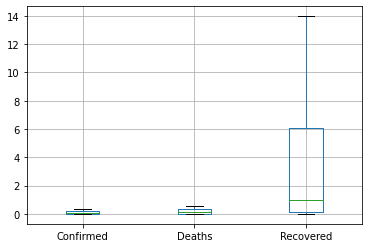

In [68]:
data_diff.boxplot(column=target)

# Scaler

# Multi Target log and fill na

In [69]:
print(X_train.shape)
print(X_test.shape)

(131, 5, 6)
(31, 5, 6)


In [70]:
y_train.shape

(131, 6)

In [71]:
count_features = X_train.shape[2]
# count_samples = X.shape[1]
print(count_features)

6


In [72]:

y_train = y_train[:,:n_output]
y_test = y_test[:,:n_output]

In [73]:
# from tensorflow.keras.optimizers import Adam, RMSprop
# from tensorflow.keras.layers import Input, concatenate, Dropout
# from tensorflow.keras.layers import PReLU
# from tensorflow.keras import Model
# from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam, RMSprop
from keras.layers import Input, concatenate, Dropout
from keras.layers import PReLU
from keras import Model
from keras.layers import BatchNormalization
def get_model_fc(n_steps, n_features, n_output=3, lr=0.001):
#     model = Sequential()
    #     model.add(keras.Input(shape=(15,)))
#     model.add(Dense(3, activation='relu', input_shape=(n_steps * n_features,)))
    input1 = Input((n_steps * n_features,))
    hidden = Dense(32, activation=PReLU())(input1)
    outputs =  Dense(3, activation='linear')(hidden) 

        
#     if n_output == 3:
#         output1 = Dense(1, activation='linear')(hidden) 
#         output2 = Dense(1, activation='linear')(hidden) 
#         output3 = Dense(1, activation='linear')(hidden) 
#         outputs = concatenate([output1, output2, output3])
#     elif n_output == 1:
#         outputs =  Dense(1, activation='linear')(hidden) 
#     else:
#         assert False
    model = keras.Model(inputs=input1, outputs=outputs)
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='mse')
    return model

In [74]:
def get_model_rnn(n_steps, n_features, n_output=3, lr=0.001):
    model = Sequential()
    model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
#     model.add(LSTM(16, activation='relu', return_sequences=False, ))
#     model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_output))
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='mse')
    return model

In [75]:
def get_model_rnn_2(n_steps, n_features, n_output=3, lr=0.001):
    hidden_size = 16

#     model = Sequential()
    input1 = Input((n_steps,n_output))
    input2 = Input((n_features - 3,))

    hidden1 = LSTM(hidden_size, activation='relu', return_sequences=False, input_shape=(n_steps, 3))(input1)
#     hidden2_0 = Dense(hidden_size//2, activation='relu')(input2)
#     hidden2_1 = Dense(hidden_size, activation='relu')(hidden2_0)
#     hidden2_2= Dropout(0.05)(hidden2_1)
#     con = concatenate([hidden1, hidden2_2])
    con = concatenate([hidden1, input2])
#     do1 = Dropout(0.15)(con)
#     d1 = Dense(hidden_size, activation='relu')(con)

    output = Dense(n_output)(con)
    opt = Adam(lr=lr)
    model = keras.Model(inputs=[input1, input2], outputs=output)
    model.compile(optimizer=opt, loss='mse')
    return model

# Fit predict

In [76]:
n_output = 1

In [77]:
count_features

6

In [78]:
# model = get_model_fc(n_steps, count_features, lr = 0.005)
# model = get_model_fc(n_steps, count_features, lr = 0.005, n_output=n_output)
# model = get_model_rnn(n_steps, count_features, lr = 0.005, n_output=1)
model = get_model_rnn_2(n_steps, count_features - 1, lr = 0.005, n_output=n_output)

In [79]:
y_test.shape

(31, 1)

In [80]:
md_train.shape

(131, 2)

In [81]:
X_train.shape

(131, 5, 6)

In [82]:
X_train.shape

(131, 5, 6)

In [83]:
y_train.shape

(131, 1)

In [84]:
np.mean(X_train)

35175.50889966425

In [85]:
X_train[:,n_steps-1,3:].shape

(131, 3)

In [86]:
X_test[:,n_steps-1,3:].shape

(31, 3)

In [87]:
count_train = X_train.shape[0]
count_test = X_test.shape[0]

In [88]:
np.mean(X_train)

35175.50889966425

In [89]:
np.mean(X_test)

35177.1040624214

In [90]:
np.mean(y_train)

0.08273171135616106

In [91]:
np.mean(y_test)

0.20149803281070153

In [92]:
keras.backend.set_value(model.optimizer.lr, 0.001)
keras.backend.get_value(model.optimizer.lr)

0.001

In [93]:
keras.backend.set_floatx('float64')

In [94]:
X_train.shape

(131, 5, 6)

In [95]:
X_train[:,:,:3].dtype

dtype('float64')

In [96]:
# X_train = np.float64(X_train)
# y_train = np.float64(y_train)
# X_test = np.float64(X_test)
# y_test = np.float64(y_test)

In [97]:
X_train.shape

(131, 5, 6)

In [98]:

history = model.fit([X_train[:,:,:n_output], X_train[:,n_steps-1,3:count_features-1]], y_train[:,:n_output],
                    validation_data = ([X_test[:,:,:n_output], X_test[:,n_steps-1,3:count_features-1]],
                                       y_test[:,:n_output]), 
                    epochs=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 131 samples, validate on 31 samples
Epoch 1/20
131/131 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0371
Epoch 2/20
131/131 [==============================] - 0s 208us/step - loss: 0.0219 - val_loss: 0.0292
Epoch 3/20
131/131 [==============================] - 0s 177us/step - loss: 0.0207 - val_loss: 0.0237
Epoch 4/20
131/131 [==============================] - 0s 181us/step - loss: 0.0199 - val_loss: 0.0204
Epoch 5/20
131/131 [==============================] - 0s 163us/step - loss: 0.0194 - val_loss: 0.0179
Epoch 6/20
131/131 [==============================] - 0s 155us/step - loss: 0.0191 - val_loss: 0.0167
Epoch 7/20
131/131 [==============================] - 0s 164us/step - loss: 0.0187 - val_loss: 0.0170
Epoch 8/20
131/131 [==============================] - 0s 161us/step - loss: 0.0182 - val_loss: 0.0169
Epoch 9/20
131/131 [===========================

In [99]:
# history = model.fit(X_train.reshape(X_train.shape[0], -1), y_train,\
#                     validation_data = (X_test.reshape(X_test.shape[0],-1), y_test), epochs=25, verbose=1)

In [100]:
# model = keras.models.load_model('model')
# model = keras.models.load_model('mdl_wts')

In [101]:
# plt.plot(np.log(history.history['loss']))

In [102]:
# plt.plot(np.log(history.history['val_loss']))

In [103]:
count_features

6

In [104]:
X_test.reshape(X_test.shape[0],-1).shape

(31, 30)

In [105]:
y_train.shape

(131, 1)

# Calculate metric

In [106]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

In [107]:
def adj_r2(y_true, y_pred):
    n_samples = len(y_true)
    return 1 - ( (1 - r2(y_true, y_pred)) * (len(y_true) - 1) ) / (n_samples - count_features - 1) 
# count_features hardcode

In [108]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [109]:
def WAPE(y_true, y_pred):
    return np.sum( np.abs(y_true - y_pred) ) / np.sum( np.abs(y_true) ) * 100

In [110]:
# yhat_train = model.predict(X_train.reshape(X_train.shape[0], -1))
# yhat_test = model.predict(X_test.reshape(X_test.shape[0],-1))

In [111]:
yhat_train = model.predict([X_train[:,:,:n_output], X_train[:,n_steps-1,3:count_features-1]])
yhat_test = model.predict([X_test[:,:,:n_output], X_test[:,n_steps-1,3:count_features-1]])

In [112]:
# name_y = ['Confirmed', 'Deaths', 'Recovered']
name_y = ['Confirmed']


name_y_pred = [i + '_pred' for i in name_y]

In [113]:
print(np.min(np.abs(yhat_test)))

0.10742850556315568


In [114]:
md_train.shape

(131, 2)

In [115]:
yhat_train.shape

(131, 1)

In [116]:
data_diff.head(10)

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
0,Brazil,03/10/2020,0.000028,0.000000,0.000000,0.0,0.0,211049.527
1,Brazil,03/11/2020,0.000033,0.000000,0.000000,0.0,0.0,211049.527
2,Brazil,03/12/2020,0.000066,0.000000,0.000000,0.0,0.0,211049.527
3,Brazil,03/13/2020,0.000469,0.000000,0.000000,0.0,0.0,211049.527
4,Brazil,03/14/2020,0.000000,0.000000,0.000000,0.0,0.0,211049.527
5,Brazil,03/15/2020,0.000052,0.000000,0.000000,0.0,0.0,211049.527
6,Brazil,03/16/2020,0.000180,0.000000,0.000005,0.0,0.0,211049.527
7,Brazil,03/17/2020,0.000573,0.000005,0.000009,0.0,0.0,211049.527
8,Brazil,03/18/2020,0.000242,0.000014,0.000009,0.0,0.0,211049.527
9,Brazil,03/19/2020,0.001180,0.000028,0.000009,1.0,0.0,211049.527


In [117]:
if data_scale:
    yhat_train = yhat_train * data_std[target[:n_output]].values  + data_mean[target[:n_output]].values

In [118]:
if data_scale:
    yhat_test = yhat_test * data_std[target[:n_output]].values  + data_mean[target[:n_output]].values

In [119]:
data.head()

,Country,Date,Confirmed,Deaths,Recovered,C5_Close public transport,E1_Income support,Population
3525,Brazil,03/09/2020,0.000118,0.0,0.0,0.0,0.0,211049.527
3526,Brazil,03/10/2020,0.000147,0.0,0.0,0.0,0.0,211049.527
3527,Brazil,03/11/2020,0.000180,0.0,0.0,0.0,0.0,211049.527
3528,Brazil,03/12/2020,0.000246,0.0,0.0,0.0,0.0,211049.527
3529,Brazil,03/13/2020,0.000715,0.0,0.0,0.0,0.0,211049.527


In [120]:
yhat_train.shape

(131, 1)

In [121]:
yhat_test.shape

(31, 1)

In [122]:
name_y_pred

['Confirmed_pred']

In [123]:
md_train.shape

(131, 2)

In [124]:
y_df_train = construct_ts(name_y[:n_output], name_y_pred[:n_output], yhat_train, md_train, 
                          data[md_features + target
                               +['Population']])
y_df_test = construct_ts(name_y[:n_output], name_y_pred[:n_output], yhat_test, md_test,
                         data[md_features + target
                              + ['Population']])

/Users/chernovandrey/PycharmProjects/network_analyse/Project2/Network-Science-Project-2/calculate_metrics.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [125]:
# y_df_train[target] = y_df_train[target]*data_std[target].values  + data_mean[target].values
# y_df_test[target] = y_df_test[target]*data_std[target].values  + data_mean[target].values

In [126]:
y_df_test

,Country,Date,Confirmed,Deaths,Recovered,Population,Confirmed_pred
0,Brazil,2020-07-24,11.103394,0.403877,8.022828,211049.527,10.968799
1,Brazil,2020-07-25,11.345740,0.409615,8.459431,211049.527,11.109207
2,Brazil,2020-07-26,11.462196,0.412244,8.589988,211049.527,11.256105
3,Brazil,2020-07-27,11.572521,0.415154,8.749799,211049.527,11.388955
4,Brazil,2020-07-28,11.765916,0.419518,8.854552,211049.527,11.504281
5,Brazil,2020-07-29,12.093204,0.427075,9.110667,211049.527,11.616700
6,Brazil,2020-07-30,12.367249,0.432425,9.271791,211049.527,11.741529
7,Brazil,2020-07-31,12.615451,0.438167,9.518401,211049.527,11.872232
8,Brazil,2020-08-01,12.830529,0.443322,9.656416,211049.527,12.010985
9,Brazil,2020-08-02,12.952775,0.445886,9.774369,211049.527,12.152783


In [127]:
for i in name_y[:n_output] + name_y_pred[:n_output]:
#     y_df_train[i] = y_df_train[i]*y_df_train['Population']
    y_df_test[i] = y_df_test[i]*y_df_test['Population']

In [128]:
y_df_test[y_df_test['Country'] == 'US'].head()

,Country,Date,Confirmed,Deaths,Recovered,Population,Confirmed_pred


In [129]:
metrics = [MAE, MAPE, adj_r2, WAPE]

In [130]:
get_metrics_from_df(y_df_train, metrics, name_y[:n_output], name_y_pred[:n_output])

,Confirmed
mean_absolute_error,4.279626
MAPE,2557.031441
adj_r2,-0.979467
WAPE,148.039709


In [131]:
get_metrics_from_df(y_df_test, metrics, name_y[:n_output], name_y_pred[:n_output])

,Confirmed
mean_absolute_error,270074.544753
MAPE,8.523907
adj_r2,0.194078
WAPE,9.039582


In [132]:
md_test.groupby(['Country']).agg({'Date':['min']}).values[0][0]

'07/24/2020'

In [133]:
pd.to_datetime(md_test.groupby(['Country']).agg({'Date':['min']}).values[0][0])

Timestamp('2020-07-24 00:00:00')

In [134]:
countries = np.unique(data['Country'])
# start_date_test = '2020-07-01'
start_date_test = md_test.groupby(['Country']).agg({'Date':['min']}).values[0][0]
end_date_train = md_train.groupby(['Country']).agg({'Date':['max']}).values[0][0]

In [135]:
md_train.groupby(['Country']).agg({'Date':['max']}).values[0][0]

'07/23/2020'

In [136]:
md_test.groupby(['Country']).agg({'Date':['min']}).values[0][0]

'07/24/2020'

In [137]:
start_dates = [pd.to_datetime(start_date_test) - pd.DateOffset(i) for i in range(1,n_steps+1)] 

In [138]:
start_dates
# assert False

[Timestamp('2020-07-23 00:00:00'),
 Timestamp('2020-07-22 00:00:00'),
 Timestamp('2020-07-21 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-07-19 00:00:00')]

In [139]:
def get_start_fact(data, name_y, country, start_date, count_test_day = 31):
    start_dates = [pd.to_datetime(start_date) - pd.DateOffset(i) for i in range(1,n_steps+2)] # чтобы diff сделать
    test_dates = [pd.to_datetime(start_date) + pd.DateOffset(i) for i in range(count_test_day)]
    X_start = data.loc[(data['Country'] == country) & (data['Date'].isin(start_dates))]\
                    .sort_values(['Date'])[name_y].diff().values[1:]
    y_test  = data.loc[(data['Country'] == country) & (data['Date'].isin(test_dates))]\
                    .sort_values(['Date'])[name_y].values
    start_y = data.loc[(data['Country'] == country) & (data['Date'] == test_dates[0] - pd.DateOffset(1))]\
                    .sort_values(['Date'])[name_y].values
    return X_start, y_test, start_y
    

In [140]:
country = 'Brazil'

In [141]:
data['Country'].value_counts().keys()

Index(['Brazil'], dtype='object')

In [142]:
md_test.groupby(['Country']).agg({'Date':['min']})

,Date
,min
Country,
Brazil,07/24/2020


In [143]:
def get_start_predict_future(country, end_train_date, start_test_date, md_test, data ):
    md_test = md_test.reset_index(drop=True)
    ind_start = md_test[(md_test['Country'] == country) & (md_test['Date'] == start_test_date)].index[0]
    data_country_init = data[(data['Country'] == country) & (data['Date'] == end_train_date)][target]
    ind  = md_test[(md_test['Country'] == country)].index
    population = data.loc[data['Country'] == country, 'Population'].iloc[0]
    return data_country_init, ind_start, population

In [144]:
def predict_future(model, X, n_output, count_days = 31, country_policy=None, noise = 0.0):
#     assert n_output == 3
    y = np.zeros(shape = (count_days, n_output))
    for i in range(count_days):
        if country_policy is None:
            y[i] = model.predict([X[:,:n_output].reshape(1,n_steps,-1), X[n_steps-1,3:count_features-1].reshape(1,-1)])
        else:
            y[i] = model.predict([X[:,:n_output].reshape(1,n_steps,-1), country_policy.reshape(1,-1)])
#         y[i] = np.maximum(y[i]*np.random.normal(1.0, noise), 0.0)
        X[:-1] = X[1:]
#         print(X.shape)
#         print(y[i].shape)
        X[-1] = np.concatenate([y[i], X[-1,n_output:]], axis=0) 
    return y 

In [145]:
def from_percent(y_pred, init_val):
    assert y_pred.shape[1] == 1
    y_pred = y_pred.reshape(-1)
    res = np.zeros(len(y_pred))
    prev_val = init_val[0][0]
    for i in range(len(y_pred)):
        res[i] = y_pred[i]*prev_val + prev_val
        prev_val = res[i]
    print(res)
    return res.reshape(-1,1)

In [146]:
def full_predict(countries, end_train_date, start_test_date, model, X_test, md_test, count_days=31, country_policy=None, noise=0.0):
    total_y_true = []
    total_y_pred = []
    for country in countries:
        data_country_init, ind_start, population = get_start_predict_future(country, end_train_date, start_test_date,
                                                                            md_test, data)
        y_pred = predict_future(model, X_test[ind_start], n_output, count_days, country_policy, noise)

        if data_scale:
            y_pred = y_pred*data_std[target].values + data_mean[target].values
        
#         y_pred = from_percent(y_pred, data_country_init.values)
        y_pred = np.cumsum(y_pred, axis=0) + data_country_init.values

        y_pred = y_pred*population

        y_true = data[(data['Country'] == country) & (data['Date'] > end_train_date)][target].values * population
        total_y_pred.append(y_pred)
        total_y_true.append(y_true)
    return np.concatenate(total_y_true, axis=0), np.concatenate(total_y_pred, axis=0)

In [147]:
# end_train_date = '06/30/2020'
# start_test_date= '07/01/2020'

# start_date_test = '2020-07-01'
total_y_true, total_y_pred = full_predict(np.unique(md_test['Country']), end_date_train, start_date_test, model, X_test, md_test)

In [148]:
total_y_pred

array([[2314959.86811523,  111566.86811523, 1647797.86811523],
       [2341257.08114898,  137864.08114898, 1674095.08114898],
       [2366636.12530964,  163243.12530964, 1699474.12530964],
       [2390204.89823608,  186811.89823608, 1723042.89823608],
       [2410866.16810177,  207473.16810177, 1743704.16810177],
       [2429178.42899204,  225785.42899204, 1762016.42899204],
       [2446710.61689997,  243317.61689997, 1779548.61689997],
       [2463575.73870356,  260182.73870356, 1796413.73870356],
       [2479861.79719858,  276468.79719858, 1812699.79719858],
       [2495687.33884716,  292294.33884716, 1828525.33884716],
       [2511207.42991446,  307814.42991446, 1844045.42991446],
       [2526536.85016174,  323143.85016174, 1859374.85016174],
       [2541721.06523725,  338328.06523725, 1874559.06523725],
       [2556797.3703935 ,  353404.3703935 , 1889635.3703935 ],
       [2571796.56700005,  368403.56700005, 1904634.56700005],
       [2586742.37272407,  383349.37272407, 1919580.372

In [149]:
total_y_true

array([[2343366.,   85238., 1693214.],
       [2394513.,   86449., 1785359.],
       [2419091.,   87004., 1812913.],
       [2442375.,   87618., 1846641.],
       [2483191.,   88539., 1868749.],
       [2552265.,   90134., 1922802.],
       [2610102.,   91263., 1956807.],
       [2662485.,   92475., 2008854.],
       [2707877.,   93563., 2037982.],
       [2733677.,   94104., 2062876.],
       [2750318.,   94665., 2098976.],
       [2801921.,   95819., 2157484.],
       [2859073.,   97256., 2190361.],
       [2912212.,   98493., 2230542.],
       [2962442.,   99572., 2272299.],
       [3012412.,  100477., 2321537.],
       [3035422.,  101049., 2356983.],
       [3057470.,  101752., 2390830.],
       [3109630.,  103026., 2449338.],
       [3164785.,  104201., 2506228.],
       [3224876.,  105463., 2521100.],
       [3275520.,  106523., 2616981.],
       [3317096.,  107232., 2622878.],
       [3340197.,  107852., 2655017.],
       [3359570.,  108536., 2699080.],
       [3407354.,  109888

In [150]:
md_test

,Country,Date
136,Brazil,07/24/2020
137,Brazil,07/25/2020
138,Brazil,07/26/2020
139,Brazil,07/27/2020
140,Brazil,07/28/2020
141,Brazil,07/29/2020
142,Brazil,07/30/2020
143,Brazil,07/31/2020
144,Brazil,08/01/2020
145,Brazil,08/02/2020


In [151]:
len(total_y_pred)

31

In [152]:
len(total_y_true)

31

In [153]:
# plt.plot(total_y_pred[32:62,0] -  total_y_pred[31:61,0], c='r')
# plt.plot(total_y_true[32:62,0] -  total_y_true[31:61,0], c='b')

In [154]:
WAPE(total_y_true[:,0], total_y_pred[:,0]) # Confirmed

13.606050805909021

In [155]:
MAE(total_y_true[:,0], total_y_pred[:,0])

406506.40864872816

In [156]:
WAPE(total_y_true[:,1], total_y_pred[:,1]) # Deaths

277.308643861813

In [157]:
MAE(total_y_true[:,1], total_y_pred[:,1])

277661.72038352996

In [158]:
WAPE(total_y_true[:,2], total_y_pred[:,2]) # Recovered

17.819805665571543

In [159]:
MAE(total_y_true[:,2], total_y_pred[:,2])

415032.66671324434

In [160]:
error_30 = pd.DataFrame(0.0, index=target, columns=['MAE', 'WAPE'])

In [161]:
for i in range(len(error_30.index)):
    error_30.at[error_30.index[i],'MAE'] = MAE(total_y_true[:,i], total_y_pred[:,i])
    error_30.at[error_30.index[i],'WAPE'] = WAPE(total_y_true[:,i], total_y_pred[:,i])

In [162]:
error_30

,MAE,WAPE
Confirmed,406506.408649,13.606051
Deaths,277661.720384,277.308644
Recovered,415032.666713,17.819806


In [163]:
np.unique(data['Country'])

array(['Brazil'], dtype=object)

In [164]:
full_rest = data[X_features].max()

no_rest = data[X_features].min()

In [165]:
# full_rest
no_rest

C5_Close public transport         0.000
E1_Income support                 0.000
Population                   211049.527
dtype: float64

In [166]:
# country = 'Brazil'
y_true, y_pred_full = full_predict([country], end_date_train, start_date_test, model, X_test, md_test, 
                              90, np.array(full_rest[:-1]), noise=0.00)

y_true, y_pred_no = full_predict([country], end_date_train, start_date_test, model, X_test, md_test, 
                              90, np.array(no_rest[:-1]), noise=0.00)

y_true, y_pred_current = full_predict([country], end_date_train, start_date_test, model, X_test, md_test, 
                              90, noise=0.00)

# y_true, y_pred_no_rest = full_predict([country], end_train_date, start_test_date, model, X_test, md_test, 
#                               90, np.array([1.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0]), noise=0.00)
# y_true, y_pred = full_predict(['Russia'], end_train_date, start_test_date, model, X_test, md_test, 
#                               count_days=31)

In [167]:
# plt.plot(y_true[:,0], label='true')
# plt.plot(y_pred[:,0],c='r', label='predict')
# plt.legend()
# plt.title('Russia')

In [168]:
full_rest = data[X_features].max()

no_rest = data[X_features].min()

In [169]:
full_rest

C5_Close public transport         1.000
E1_Income support                 1.000
Population                   211049.527
dtype: float64

In [170]:
start_date_test

'07/24/2020'

In [171]:
from datetime import timedelta
d = [pd.to_datetime(start_date_test)+timedelta(days=i) for i in range(90)]

In [172]:
len(d)

90

Text(0.5, 1.0, 'Brazil')

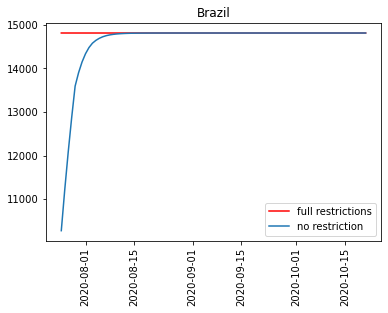

In [173]:
# plt.plot(y_pred_no[1:len(y_pred_no),0] - y_pred_no[:len(y_pred_no)-1,0], label='no restrictions')
plt.plot(d[1:],y_pred_full[1:len(y_pred_full),0] - y_pred_full[:len(y_pred_full)-1,0], c='r', label='full restrictions')
plt.plot(d[1:],y_pred_current[1:len(y_pred_no),0] - y_pred_current[:len(y_pred_no)-1,0], label='no restriction')
# plt.plot(d[1:],y_pred_no[1:len(y_pred_no),0] - y_pred_no[:len(y_pred_no)-1,0], label='no restriction')
# plt.plot(d[1:],y_pred_no_rest[1:len(y_pred_no_rest),0] - y_pred_no_rest[:len(y_pred_no_rest)-1,0] + 10000, label='full restriction')


plt.legend()
plt.xticks(rotation=90)
plt.title(country)

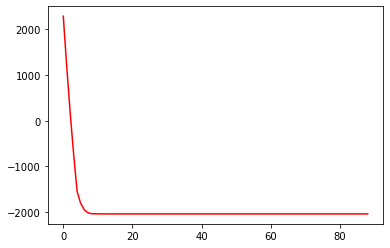

In [174]:
plt.plot(y_pred_no[1:len(y_pred_no),0] - y_pred_no[:len(y_pred_no)-1,0], c = 'r')

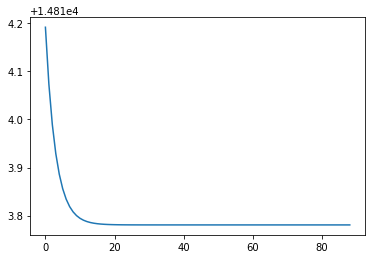

In [175]:
plt.plot(y_pred_full[1:len(y_pred_full),0] - y_pred_full[:len(y_pred_full)-1,0])

In [176]:
len(y_pred_no_rest[1:len(y_pred_no_rest),0] - y_pred_no_rest[:len(y_pred_no_rest)-1,0])

NameError: name 'y_pred_no_rest' is not defined

In [ ]:
len(np.unique(kek))

In [ ]:
plt.plot(y_pred[1:len(y_pred),0] - y_pred[:len(y_pred)-1,0], c='r', label='pred')

In [ ]:
data[X_features]

In [ ]:
dates = data['Date']

In [ ]:
from datetime import timedelta

In [ ]:
kek = []
d = pd.to_datetime(np.unique(dates[dates > '05/25/2020'])) + timedelta(31)
kek += d
kek += d + timedelta(30)
kek += kek[1] + timedelta(30)

In [ ]:
len(np.unique(kek))

In [ ]:
len([pd.to_datetime('2020-06-25')+timedelta(days=i) for i in range(90)])

In [ ]:
import pydot
import pydotplus
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
#     expand_nested=False,
#     dpi=96,
)

In [ ]:
from tensorflow import keras
import pydot as pyd
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
keras.utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))
#create your model
#then call the function on your model
visualize_model(model)

In [ ]:
full_rest = data[X_features].max()

In [ ]:
no_rest = data[X_features].min()

In [ ]:
no_rest

In [ ]:
countries = ['Chile', 'Peru', 'US', 'Sweden', 'Brazil', 'Spain', 'Belgium', 'Saudi Arabia', 'United Kingdom', 'Russia']

In [ ]:
countries = np.unique(data['Country'])

In [ ]:
d = [pd.to_datetime('2020-06-25')+timedelta(days=i) for i in range(90)]
res = pd.DataFrame(0.0, index = countries, columns=d)

In [ ]:
res

In [ ]:
for i in range(len(countries)):
#     print(countries[i])
    _, pred = full_predict([countries[i]], end_train_date, start_test_date, model, X_test, md_test, 
                              90, noise=0.00)
    res.loc[countries[i]] = pred[:,0]

In [ ]:
res['2020-09-22'].sort_values()

In [ ]:
res.loc['China']

In [ ]:
ind_start = md_test[(md_test['Country'] == countries[i]) & (md_test['Date'] == start_test_date)]

In [ ]:
md_test[md_test['Country'] == countries[4]]

In [ ]:
start_test_date

In [ ]:
ind_start

In [ ]:
res.loc[countries[i]]

In [ ]:
res['2020-09-22'].sort_values()

In [ ]:
md_test

In [ ]:
res.to_csv('powerfull_predcition.csv')

In [ ]:
res

In [ ]:
polic = pd.read_csv('polic.csv')

In [ ]:
polic.isnull().sum(axis = 0)

In [ ]:
polic.shape

In [ ]:
col = polic.loc[polic['Country'] == 'Italy'].isnull().sum(axis = 0)

In [ ]:
country = np.unique(polic['Country'])

In [ ]:
res = pd.Series(0, index=country)

In [ ]:

for i in range(len(country)):
    col = polic.loc[polic['Country'] == country[i]].isnull().sum(axis = 0)
    res[country[i]] = np.mean(col[3:])

In [ ]:
res.sort_values().to_csv('null_values.csv')

In [ ]:
res = res.sort_values()

In [ ]:
plt.plot(res, 'bo')
plt.show()